In [1]:
!pip install pyspeckit

In [2]:
import pyspeckit as psk 
import numpy as np
import matplotlib.pyplot as plt
from astropy import units as u

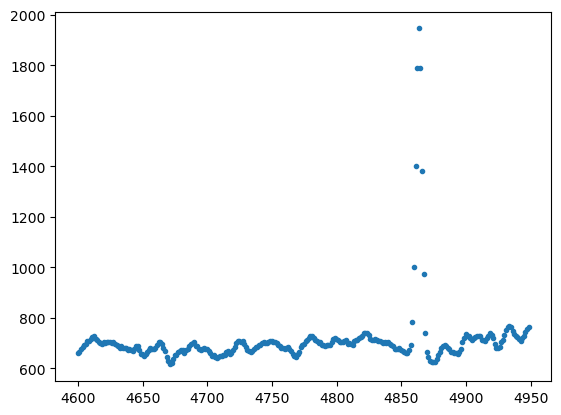

In [3]:
# plotting the data

data = np.genfromtxt("ngc253_hb.tab")
wavelength = data[:,0]
intensity = data[:,1]

fig1, ax1 = plt.subplots(1,1)
ax1.scatter(wavelength, intensity, marker = '.')

Error 'FigureManagerBase' object has no attribute 'key_press' was raised when trying to connect the key_press handler.  Please file an issue on github.  You may try a different matplotlib backend as a temporary workaround


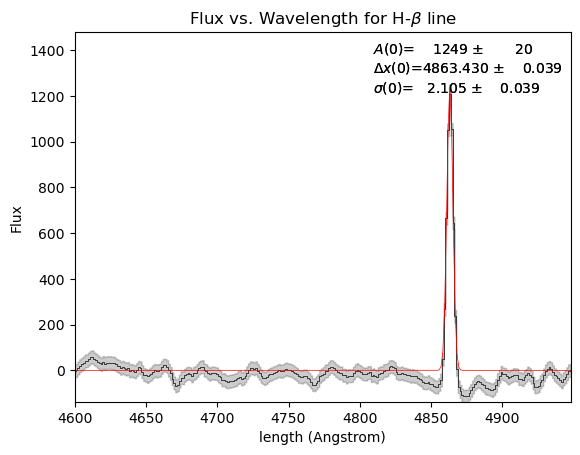

In [4]:
# find noise/standard deviation:

n1 = intensity[:205]
n2 = intensity[216:]
noise = np.concatenate((n1, n2))
std = np.std(noise)
error = std*np.ones_like(intensity)

# use pyspeckit to fit and plot

sp = psk.Spectrum(data = intensity, error = error, xarr = wavelength, xarrkwargs={'unit':'AA'}, unit='Flux')

sp.plotter()
sp.baseline()

amplitude_guess = intensity.max()
center_guess = 4863
width_guess = 5 # FWHM
guesses = [amplitude_guess, center_guess, width_guess]

sp.specfit(fittype='gaussian', guesses=guesses)

sp.plotter(errstyle='fill', title = r"Flux vs. Wavelength for H-$\beta$ line")
sp.specfit.plot_fit()

sp.plotter.savefig("figure.png")